<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_op_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install autorch >log.txt

In [64]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam
max_epochs = 10

# c620 模擬數據

 20%|██        | 2/10 [00:00<00:01,  5.27it/s]

epoch:0 train_loss:0.0426 valid_loss:0.0158


100%|██████████| 10/10 [00:01<00:00,  5.23it/s]


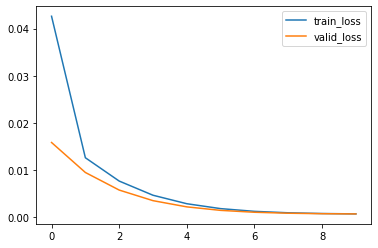

In [65]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()

# modeling
c620_op_model = autorch.utils.PartBulider(c620_df,x_col,op_col,limit_y_range=True,max_epochs=max_epochs)
c620_op_model.net = nn.Linear(len(x_col),len(op_col))
c620_op_model.optimizer = Adam(c620_op_model.net.parameters())
c620_op_model.train()

In [66]:
# test
c620_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0.999822,2.6197e-10,0.000842667
Density_Vent Gas Production Rate and Composition,0.967703,8.01689e-07,0.141118
Density_Distillate Production Rate and Composition,0.907714,1.02112e-05,0.302636
Density_Sidedraw Production Rate and Composition,0.998577,1.61649e-09,0.00383735
Density_Bottoms Production Rate and Composition,0.998669,2.24786e-11,0.000501288
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.9915,1.12444,0.633968
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.95764,0.0567731,0.116856
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.99401,0.00460204,0.0268132
AVG,0.976955,0.148228,0.153322


In [67]:
import joblib
# save
joblib.dump(c620_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op.pkl']

# c620遷移學習

In [68]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_op_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=8, bias=True)


In [69]:
c620_op_model = autorch.utils.PartBulider(c620_df_real,x_col,op_col,limit_y_range=True,max_epochs=max_epochs) # use real data  
c620_op_model.net = pretrain_net # use pretrain net
c620_op_model.optimizer = Adam(c620_op_model.net.parameters())

100%|██████████| 10/10 [00:00<00:00, 247.25it/s]

epoch:0 train_loss:0.0902 valid_loss:0.0896


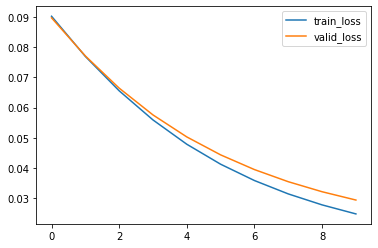

In [70]:
c620_op_model.train()

In [71]:
# test
c620_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0,9.96374e-05,0.85708
Density_Vent Gas Production Rate and Composition,0,0.167861,88.6338
Density_Distillate Production Rate and Composition,0,1.76709e-05,0.409137
Density_Sidedraw Production Rate and Composition,0,4.68313e-06,0.177836
Density_Bottoms Production Rate and Composition,0,4.30159e-07,0.0587214
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.14155,21.4839,3.52107
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.252118,10.3126,1.68102
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,2.01758,0.527912
AVG,0.0492086,4.24776,11.9833


In [72]:
# save
joblib.dump(c620_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl']

# c660 模擬數據

 10%|█         | 1/10 [00:00<00:01,  5.01it/s]

epoch:0 train_loss:0.0434 valid_loss:0.0169


100%|██████████| 10/10 [00:01<00:00,  5.14it/s]


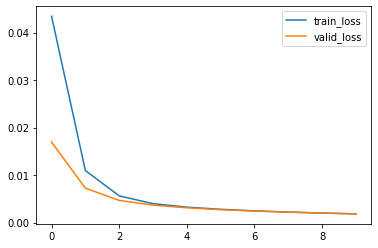

In [73]:
# load data
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0)
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c660_df_real[op_col].dropna(axis=1).columns.tolist()

# modeling
c660_op_model = autorch.utils.PartBulider(c660_df,x_col,op_col,limit_y_range=True,max_epochs=max_epochs)
c660_op_model.net = nn.Linear(len(x_col),len(op_col))
c660_op_model.optimizer = Adam(c660_op_model.net.parameters())
c660_op_model.train()

In [74]:
c660_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0.987275,9.20811e-09,0.00873741
Density_Vent Gas Production Rate and Composition,0.94016,1.88503e-05,0.62259
Density_Distillate (Benzene Drag) Production Rate and Composition,0.847483,1.18701e-05,0.311402
Density_Sidedraw (Benzene )Production Rate and Composition,0.810109,2.02318e-11,0.000394747
Density_Bottoms Production Rate and Composition,0.98011,1.49157e-09,0.0034496
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.929024,60.9495,4.71189
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.920615,0.00358271,0.0545892
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.889399,0.0891585,0.25258
AVG,0.913022,7.63029,0.745704


In [75]:
joblib.dump(c660_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op.pkl']

# c660遷移學習

In [76]:
pretrain_net = deepcopy(c660_op_model.net.train())
print(pretrain_net)

Linear(in_features=43, out_features=8, bias=True)


In [77]:
c660_op_model = autorch.utils.PartBulider(c660_df_real,x_col,op_col,limit_y_range=True,max_epochs=max_epochs) # use real data  
c660_op_model.net = pretrain_net # use pretrain net
c660_op_model.optimizer = Adam(c660_op_model.net.parameters())

100%|██████████| 10/10 [00:00<00:00, 243.55it/s]

epoch:0 train_loss:0.1192 valid_loss:0.1244


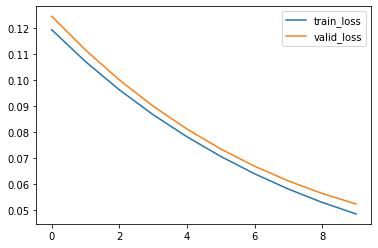

In [78]:
c660_op_model.train()

In [79]:
c660_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0,1.1315e-07,0.0258346
Density_Vent Gas Production Rate and Composition,0,0.00612156,10.6482
Density_Distillate (Benzene Drag) Production Rate and Composition,0,0.299202,59.4655
Density_Sidedraw (Benzene )Production Rate and Composition,0,0.039198,19.8121
Density_Bottoms Production Rate and Composition,0,0.116591,32.3804
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,92.0674,5.88726
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,0.700219,0.816207
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,1.44547,1.166
AVG,0,11.8343,16.2752


In [80]:
# save
joblib.dump(c660_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op_real_data.pkl']

# c670 模擬數據

In [81]:
# load data
import numpy as np
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0)
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')

In [82]:
# 根據條件修改值
def change_value(df):
  a = df[c['upper_bf']]
  紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
  紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
  紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
  紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
  df.loc[:,紫色零點零欄位] = 0.0001 
  df.loc[:,紫色零點一欄位] = 0.0001 
  df.loc[:,紫色零點九欄位] = 0.9999
  df.loc[:,紫色一點零欄位] = 0.9999
  return df

In [83]:
c670_df = change_value(c670_df)

In [84]:
c670_df_real = change_value(c670_df_real)

In [85]:
x_col = c['combined'] + c['upper_bf']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c670_df_real[op_col].dropna(axis=1).columns.tolist()

 10%|█         | 1/10 [00:00<00:01,  5.08it/s]

epoch:0 train_loss:0.0238 valid_loss:0.0071


100%|██████████| 10/10 [00:02<00:00,  4.93it/s]


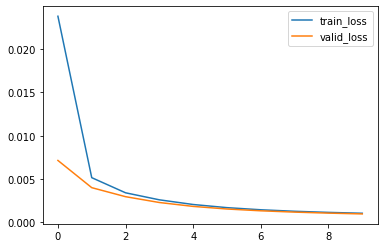

In [86]:
c670_op_model = autorch.utils.PartBulider(c670_df,x_col,op_col,limit_y_range=True,max_epochs=max_epochs)
c670_op_model.net = nn.Linear(len(x_col),len(op_col))
c670_op_model.optimizer = Adam(c670_op_model.net.parameters())
c670_op_model.train()

In [87]:
c670_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0.953651,3.94299e-11,0.000386029
Density_Bottoms Production Rate and Composition,0.995899,7.7226e-10,0.00260331
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0.926005,45.0523,2.05654
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0.846793,0.00888951,0.0417945
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.988281,0.0322512,0.0631481
AVG,0.942126,9.01869,0.432895


In [88]:
joblib.dump(c670_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op.pkl']

# c670 遷移學習

In [89]:
pretrain_net = deepcopy(c670_op_model.net.train())
print(pretrain_net)

Linear(in_features=82, out_features=5, bias=True)


In [90]:
c670_op_model = autorch.utils.PartBulider(c670_df_real,x_col,op_col,limit_y_range=True,max_epochs=max_epochs) # use real data  
c670_op_model.net = pretrain_net # use pretrain net
c670_op_model.optimizer = Adam(c670_op_model.net.parameters())

100%|██████████| 10/10 [00:00<00:00, 277.40it/s]

epoch:0 train_loss:0.1223 valid_loss:0.1126


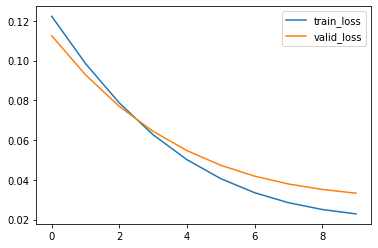

In [91]:
c670_op_model.train()

In [92]:
c670_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0,0.0303761,15.1087
Density_Bottoms Production Rate and Composition,0,1.51839e-06,0.100789
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,219.144,4.60571
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,5.54883,0.853297
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.610714,2.50061,0.428486
AVG,0.122143,45.4448,4.2194


In [93]:
joblib.dump(c670_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_op_real_data.pkl']